### Classification
Let's discuss classification models first. When building a supervised model, there is always some kind of outcome we're interested in. What kind of variable that is informs what kind of model we are going to build.

For a classification model, that variable will be categorical. This means that the variable only takes discrete values from within a specified set. Simple versions of that set could look something like {yes, no} or {heads, tails}. The outcomes could also contain more than two values such as {high, medium, low} or {buy, rent, no purchase}. Almost anything that can be discretely counted and labeled can be considered a categorical variable. In the earlier assignment on feature engineering we discussed the three kinds of categorical variables: ordinal, interval, and ratio variables.

So, given this, the outcome of a classifier is typically one of two things. It will either assign a category to a given test observation or it will assign a probability of each category. This means say if the potential outcomes were {yes, no}, for a given test row the output of a classifier would either be {yes} or {no} or some probability measure for each such as {.2, .8}.

It is important to note that with a classifier, the only outcomes that will be seen as possible have to be in the training set. So if your test set has a value for the outcome variable that was not in the training set it will not be able to predict it correctly. One example could be if you were trying to predict the show that someone would watch on a movie website and a new movie was released. If that movie isn't in the training set you can't predict if people will watch it.

### Regression
In contrast to classification, regression models have a continuous outcome variable. As such regressions can output either on a bounded or unbounded number line. That also implies a relationship between the variables. This simply means something like 3 is greater than 2 is greater than 1, and the intermediate values imply just that, they are between each other.

Example variables that would work for regression would be something like amount spent which could range from 0 to some potentially very large observable max, or temperature which ranges from absolute zero to again observably high (though any model would likely concentrate output in a more specific region). Many regression techniques can give predictions even beyond observed maxima and minima, while others are more bounded.

# sentiment analysis with Naive bayes

In [16]:
# Grab and process the raw data.
import pandas as pd
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [17]:
sms_raw

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [18]:
#The words chosen below are simply intuited as possibly having something to do with spam
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
       # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ', case=False)

In [19]:
#Another feature option would be if the message is all uppercase. That seems kind of spammy doesn't it?
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [20]:
sms_raw

,spam,message,click,offer,winner,buy,free,cash,urgent,allcaps
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False
3,ham,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False
5,spam,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False
6,ham,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False
7,ham,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False
8,spam,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False
9,spam,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False


Before we go further, let's turn the spam column into a boolean so we can easily do some statistics to prepare for modeling.

In [21]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [22]:
sms_raw

,spam,message,click,offer,winner,buy,free,cash,urgent,allcaps
0,False,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False
4,False,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False
5,True,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False
6,False,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False
7,False,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False
8,True,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False
9,True,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False


In [7]:
import seaborn as sns

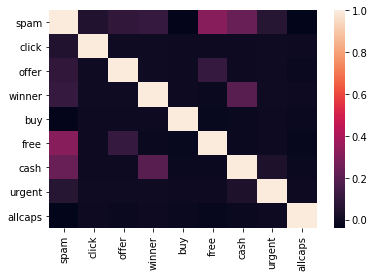

In [8]:
sns.heatmap(sms_raw.corr())

Before we actually run the model we have to build out our training data. SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). We'll do that below under the titles data and target.

In [9]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [10]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [27]:
print("Percent of mislabeled points is {}, percent of correct labeled points is {}".format(((target != y_pred).sum())*100/data.shape[0], ((target == y_pred).sum())*100/data.shape[0]))

Percent of mislabeled points is 10.839913854989232, percent of correct labeled points is 89.16008614501077


# Confusion Matrix
The next level of analysis of your classifier is often something called a Confusion Matrix. This is a matrix that shows the count of each possible permutation of target and prediction. So in our case, it will show the counts for when a message was ham and we predicted ham, when a message was ham and we predicted spam, when a message was spam and we predicted ham, and when a message was spam and we predicted spam.

In [99]:
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(y_pred)): 
        if target[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and target[i]!=y_pred[i]:
           FP += 1
        if target[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and target[i]!=y_pred[i]:
           FN += 1
    


In [103]:
print('Confusion_Matrix is: \n {} {} \n {} {}'.format(TN, FP, FN, TP))

Confusion_Matrix is: 
 4770 55 
 549 198


In [104]:
print('Sensitivity is: {}'.format((TN+TP)*100/(TP+TN+FP+FN)))

Sensitivity is: 89.16008614501077


### Sensitivity - positive correctly identified:


In [124]:
target_pos = 0
for i in range(len(target)): 
        if target[i]== 1:
           target_pos += 1
print('Sensitivity is: {}'.format(100*TP/target_pos)) 


Sensitivity is: 26.50602409638554


In [ ]:
Specificity - negatives correctly identified

In [125]:
target_neg = 0
for i in range(len(target)): 
        if target[i]== 0:
           target_neg += 1
print('Specificity is: {}'.format(100*TN/target_neg)) 

Specificity is: 98.860103626943


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]])

A __false positive__ is when we identify something as spam that is not. In this case we had 55 of these. This is sometimes also called a "Type I Error" or a "false alarm".

A __false negative__ is therefore when we mistakenly identify something as not spam when it is. We had 549 of these. This is also called a "Type II Error" or a "miss".

This also brings us to a conversation of sensitivity vs specificity.

__Sensitivity__ is the percentage of positives correctly identified, in our case 198/747 or 27%. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

__Specificity__ is just the opposite, the percentage of negatives correctly identified, 4770/4825 or 99%.